### Complejidad - Práctico 6 - Criticalidad auto organizada en crashes financieros
#### Lautaro Giordano

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
from scipy import stats

In [90]:
# Descarga los datos históricos del S&P 500
ticker = "^GSPC"  # Símbolo del S&P 500 en Yahoo Finance
sp500 = yf.download(ticker, start="1980-01-01", end="2024-01-01", interval="1d")

# Mostrar las primeras filas de los datos
print(sp500.head())

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                          ^GSPC       ^GSPC       ^GSPC       ^GSPC   
Date                                                                        
1980-01-02 00:00:00+00:00  105.760002  105.760002  108.430000  105.290001   
1980-01-03 00:00:00+00:00  105.220001  105.220001  106.080002  103.260002   
1980-01-04 00:00:00+00:00  106.519997  106.519997  107.080002  105.089996   
1980-01-07 00:00:00+00:00  106.809998  106.809998  107.800003  105.800003   
1980-01-08 00:00:00+00:00  108.949997  108.949997  109.290001  106.290001   

Price                      Open    Volume  
Ticker                    ^GSPC     ^GSPC  
Date                                       
1980-01-02 00:00:00+00:00   0.0  40610000  
1980-01-03 00:00:00+00:00   0.0  50480000  
1980-01-04 00:00:00+00:00   0.0  39130000  
1980-01-07 00:00:00+00:00   0.0  44500000  
1980-01-08 00:00:00+00:00   0.0  53390000  


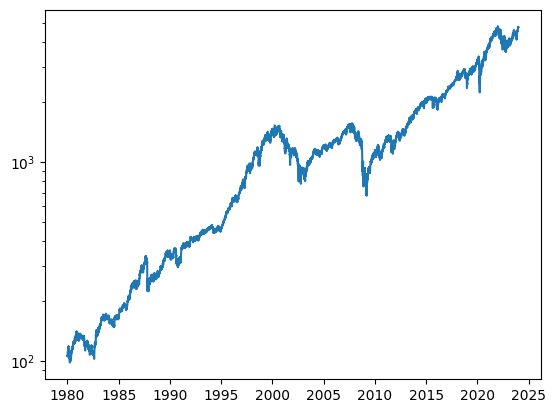

In [91]:
plt.plot(sp500["Adj Close"])
plt.yscale("log")

In [92]:
# Calcular los retornos logarítmicos
sp500['Log Return'] = np.log(sp500['Adj Close'] / sp500['Adj Close'].shift(1))

# Eliminar valores NaN resultantes del desplazamiento
sp500.dropna(inplace=True)

# Mostrar las primeras filas de los datos con retornos
print(sp500[['Adj Close', 'Log Return']].head())

Price                       Adj Close Log Return
Ticker                          ^GSPC           
Date                                            
1980-01-03 00:00:00+00:00  105.220001  -0.005119
1980-01-04 00:00:00+00:00  106.519997   0.012279
1980-01-07 00:00:00+00:00  106.809998   0.002719
1980-01-08 00:00:00+00:00  108.949997   0.019838
1980-01-09 00:00:00+00:00  109.050003   0.000917


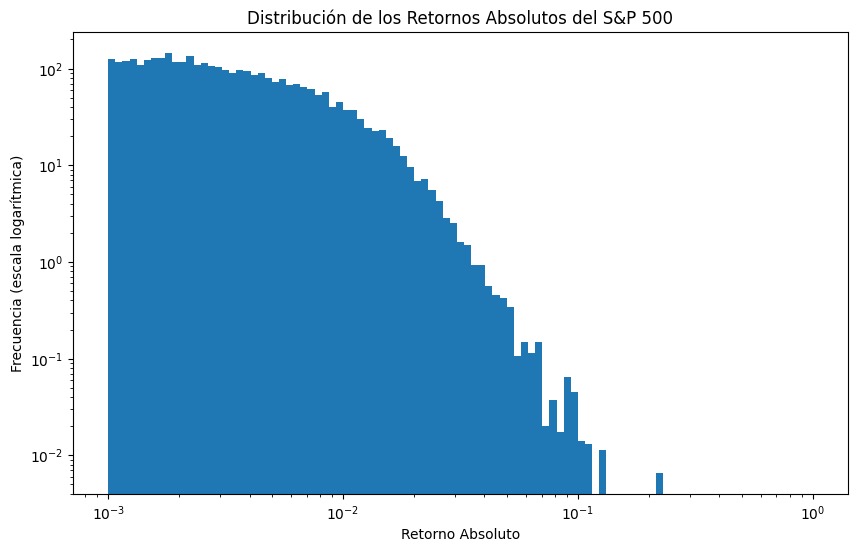

In [93]:
# Histograma de los retornos absolutos
plt.figure(figsize=(10, 6))

bins = np.logspace(-3, 0, 100)

plt.hist(np.abs(sp500['Log Return']), bins=bins, density=True)
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Retorno Absoluto")
plt.ylabel("Frecuencia (escala logarítmica)")
plt.title("Distribución de los Retornos Absolutos del S&P 500")
plt.show()

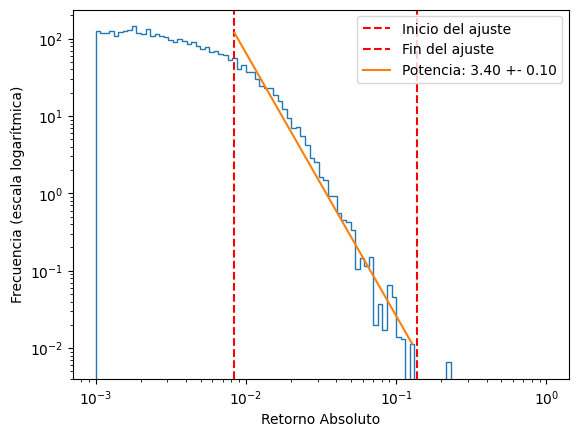

In [112]:
bins = np.logspace(-3, 0, 100)
counts, bins, _ = plt.hist(np.abs(sp500['Log Return']), bins=bins, density=True, histtype='step')
plt.xscale("log")
plt.yscale("log")

x = (bins[:-1] + bins[1:]) / 2

# Ajustar una distribución de potencia a los datos
start = 30
end = 70
plt.axvline(x[start], color='r', linestyle='--', label='Inicio del ajuste')
plt.axvline(x[end], color='r', linestyle='--', label='Fin del ajuste')

x_fit = x[start:end]
y_fit = counts[start:end]

# Borro los valores 0 para que no haya problemas al hacer el ajuste
x_fit = x_fit[y_fit > 0]
y_fit = y_fit[y_fit > 0]

popt, pcov = np.polyfit(np.log(x_fit), np.log(y_fit), 1, cov=True)
alpha = -popt[0]
beta = np.exp(popt[1])

plt.plot(x_fit, beta * x_fit ** (-alpha), label=f'Potencia: {alpha:.2f} +- {np.sqrt(pcov[0, 0]):.2f}')

plt.xlabel("Retorno Absoluto")
plt.ylabel("Frecuencia (escala logarítmica)");

plt.legend()


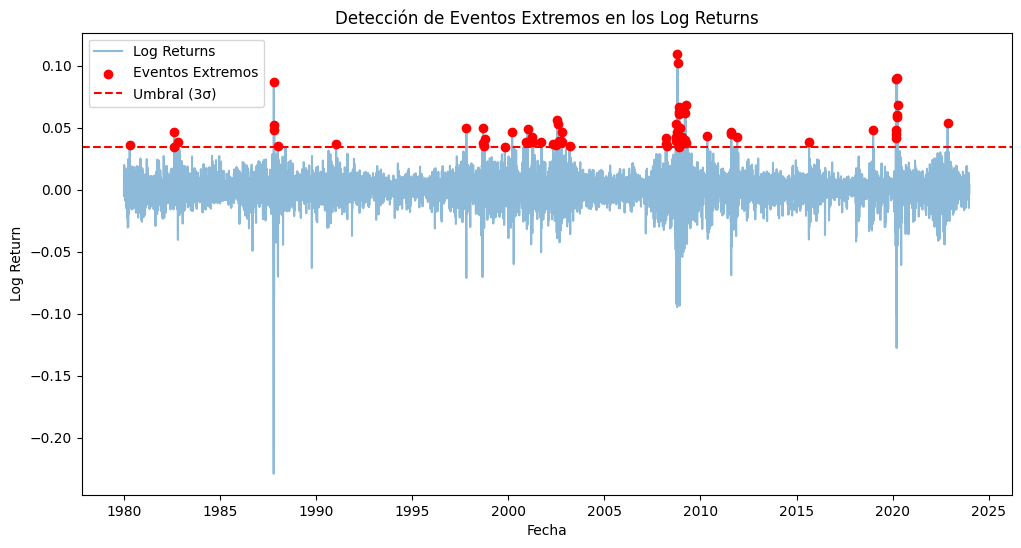

In [114]:
# Calcular el umbral como, por ejemplo, 3 desviaciones estándar por encima de la media
mean_return = sp500['Log Return'].mean()
std_return = sp500['Log Return'].std()
threshold = mean_return + 3 * std_return

# Detectar eventos extremos
extreme_events = sp500['Log Return'][sp500['Log Return'] > threshold]

# Graficar los eventos extremos
plt.figure(figsize=(12, 6))
plt.plot(sp500['Log Return'], label="Log Returns", alpha=0.5)
plt.scatter(extreme_events.index, extreme_events, color='red', label="Eventos Extremos", zorder=5)
plt.axhline(threshold, color='red', linestyle='--', label="Umbral (3σ)")
plt.xlabel("Fecha")
plt.ylabel("Log Return")
plt.title("Detección de Eventos Extremos en los Log Returns")
plt.legend()
plt.show()
